In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

import warnings
warnings.filterwarnings('ignore')

In [54]:
data = pd.read_csv('Iris.csv')
data.drop(columns='Id', inplace=True, axis=1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Exploratory Data Analysis

In [55]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [56]:
data.groupby('Species').mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Model Building

###### train test split

In [58]:
X = data.drop(columns='Species', inplace=False, axis=1)
y = data.Species

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=99)
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
10,5.4,3.7,1.5,0.2
25,5.0,3.0,1.6,0.2
13,4.3,3.0,1.1,0.1
131,7.9,3.8,6.4,2.0
65,6.7,3.1,4.4,1.4


### DecisionTreeClassifier object and train

In [60]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

###### prediction using trainig data

In [61]:
pred_res1 = model.predict(X_train)

In [62]:
print(classification_report(y_train, pred_res1))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        38
Iris-versicolor       1.00      1.00      1.00        32
 Iris-virginica       1.00      1.00      1.00        35

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105



In [63]:
confusion_matrix(y_train, pred_res1)

array([[38,  0,  0],
       [ 0, 32,  0],
       [ 0,  0, 35]], dtype=int64)

In [64]:
accuracy_score(y_train, pred_res1)

1.0

###### prediction using test data

In [65]:
pred2 = model.predict(X_test)

In [66]:
print(classification_report(y_test, pred2))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.93      0.93      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [67]:
confusion_matrix(y_test, pred2)

array([[12,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 14]], dtype=int64)

In [68]:
accuracy_score(y_test, pred2)

0.9555555555555556

# Plotting the Decision Tree

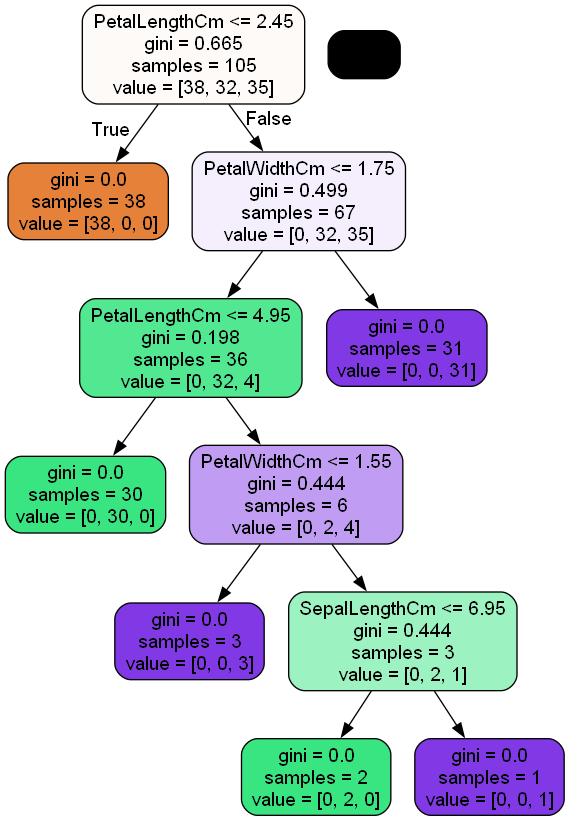

In [69]:
features = list(X_train.columns)
dot_data = StringIO()
export_graphviz(decision_tree=model, out_file=dot_data, feature_names=features, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Optimise HyperParameters using KFold and GridSearchCV

###### max_depth

In [70]:
from sklearn.model_selection import KFold, GridSearchCV

no_of_kfolds = 5

parameters = {'max_depth': range(0,10)}

dtree = DecisionTreeClassifier(criterion='gini', random_state=100)


tree = GridSearchCV(estimator=dtree, cv=no_of_kfolds, param_grid=parameters, return_train_score=True, scoring='accuracy')
tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(0, 10)}, return_train_score=True,
             scoring='accuracy')

In [71]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001604,0.000481,0.000000,0.000000,0,{'max_depth': 0},NaN,NaN,NaN,NaN,...,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.004838,0.001277,0.002991,0.000631,1,{'max_depth': 1},0.714286,0.714286,0.714286,0.666667,...,0.695238,0.023328,9,0.690476,0.690476,0.690476,0.702381,0.702381,0.695238,0.005832
2,0.003590,0.000489,0.003204,0.000762,2,{'max_depth': 2},0.952381,1.000000,0.857143,0.952381,...,0.942857,0.046657,7,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664
3,0.004196,0.000378,0.002393,0.000489,3,{'max_depth': 3},0.952381,1.000000,0.809524,0.952381,...,0.942857,0.069985,7,0.964286,0.976190,0.988095,0.988095,0.976190,0.978571,0.008909
4,0.004292,0.000639,0.002201,0.000415,4,{'max_depth': 4},1.000000,1.000000,0.857143,0.952381,...,0.952381,0.052164,6,0.976190,0.988095,1.000000,0.988095,1.000000,0.990476,0.008909


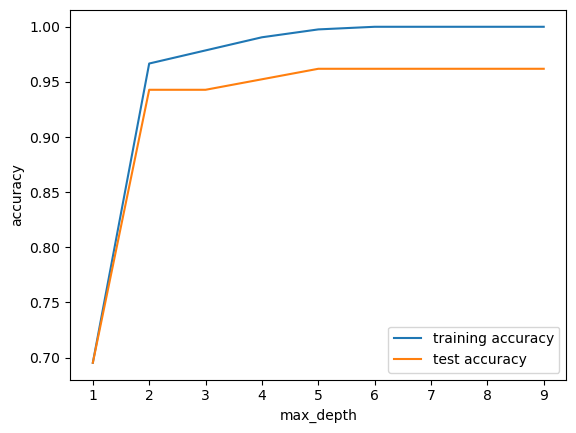

In [72]:
plt.figure()
plt.plot(scores['param_max_depth'], scores['mean_train_score'], label='training accuracy')
plt.plot(scores['param_max_depth'], scores['mean_test_score'], label='test accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

###### min_samples_leaf

In [76]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [78]:
no_of_Kfolds = 5

parameters2 = {"min_samples_leaf": range(1,40,3)}

dtree2 = DecisionTreeClassifier(criterion='gini', random_state=100)

tree2 = GridSearchCV(estimator=dtree2, param_grid=parameters2, return_train_score=True, cv=no_of_Kfolds, scoring='accuracy')
tree2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(1, 40, 3)},
             return_train_score=True, scoring='accuracy')

In [79]:
scores2 = pd.DataFrame(tree2.cv_results_)
scores2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004395,0.001491,0.004375,0.002250,1,{'min_samples_leaf': 1},1.000000,1.0,0.857143,1.000000,...,0.961905,0.055533,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.003982,0.001079,0.002593,0.000489,4,{'min_samples_leaf': 4},0.952381,1.0,0.857143,1.000000,...,0.961905,0.055533,1,0.964286,0.976190,0.988095,0.976190,0.976190,0.976190,0.007529
2,0.003390,0.000503,0.003583,0.000795,7,{'min_samples_leaf': 7},0.952381,1.0,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.964286,0.988095,0.964286,0.964286,0.969048,0.009524
3,0.003789,0.000399,0.002593,0.000489,10,{'min_samples_leaf': 10},0.952381,1.0,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664
4,0.004189,0.000978,0.002593,0.000489,13,{'min_samples_leaf': 13},0.952381,1.0,0.857143,0.952381,...,0.942857,0.046657,3,0.964286,0.952381,0.988095,0.964286,0.964286,0.966667,0.011664


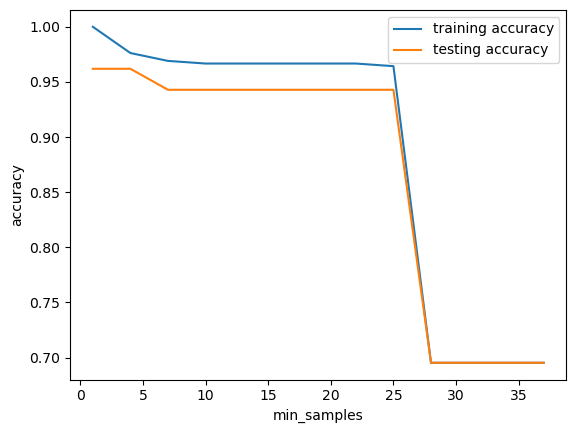

In [81]:
plt.figure()

plt.plot(scores2['param_min_samples_leaf'], scores2['mean_train_score'], label='training accuracy')
plt.plot(scores2['param_min_samples_leaf'], scores2['mean_test_score'], label='testing accuracy')
plt.xlabel('min_samples')
plt.ylabel('accuracy')
plt.legend()
plt.show()

##### GridSearch to find optimal parameters in a single script

In [82]:
param_grid = {
    "max_depth":range(0,10),
    "min_samples_leaf":range(1,40,2),
    "min_samples_split":range(2,30,2),
    "criterion":['entropy','gini']
}
n_folds = 5

iristree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=iristree, param_grid=param_grid, verbose=True, return_train_score=True, cv=n_folds)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5600 candidates, totalling 28000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(1, 40, 2),
                         'min_samples_split': range(2, 30, 2)},
             return_train_score=True, verbose=True)

In [83]:
scores_all = pd.DataFrame(grid_search.cv_results_)
scores_all.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001789,3.946809e-04,0.0,0.0,entropy,0,1,2,"{'criterion': 'entropy', 'max_depth': 0, 'min_...",NaN,...,NaN,NaN,5041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002992,1.545234e-03,0.0,0.0,entropy,0,1,4,"{'criterion': 'entropy', 'max_depth': 0, 'min_...",NaN,...,NaN,NaN,5041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.001596,1.196457e-03,0.0,0.0,entropy,0,1,6,"{'criterion': 'entropy', 'max_depth': 0, 'min_...",NaN,...,NaN,NaN,5041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000997,3.504023e-07,0.0,0.0,entropy,0,1,8,"{'criterion': 'entropy', 'max_depth': 0, 'min_...",NaN,...,NaN,NaN,5041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.001396,7.984164e-04,0.0,0.0,entropy,0,1,10,"{'criterion': 'entropy', 'max_depth': 0, 'min_...",NaN,...,NaN,NaN,5041,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
print('Best Accuracy: ', grid_search.best_score_)
print('Best Param: ', grid_search.best_estimator_)

Best Accuracy:  0.9714285714285715
Best Param:  DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3)


#### Now we create a model with these params

In [85]:
iristree2 = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3, min_samples_split=2, random_state=100)
iristree2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       random_state=100)

In [86]:
iristree2.score(X_test, y_test)

0.9555555555555556

###### plotting the decision tree

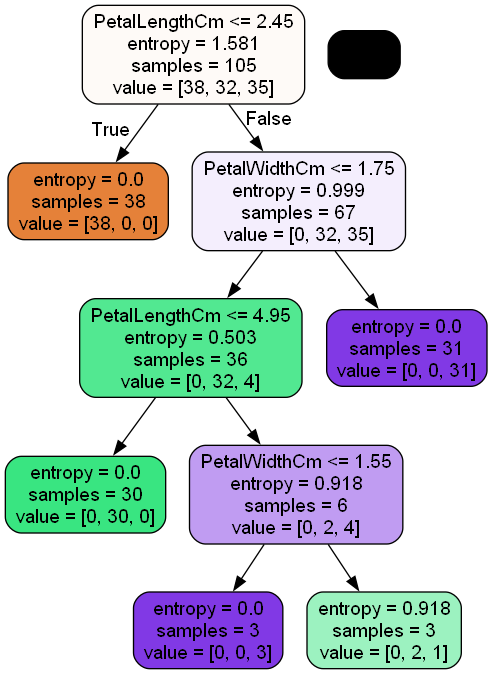

In [88]:
dot_data2 = StringIO()
export_graphviz(decision_tree=iristree2, out_file=dot_data2, feature_names=features, filled=True, rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data2.getvalue())
Image(graph.create_png())